<a href="https://colab.research.google.com/github/paulteeter/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/Paul_Teeter_DSPT7_LS_DS_112_Make_Features_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200> 

# Assignment:

- Replicate the lesson code.

 - This means that if you haven't followed along already, type out the things that we did in class. Forcing your fingers to hit each key will help you internalize the syntax of what we're doing. Make sure you understand each line of code that you're writing, google things that you don't fully understand.
 - [Lambda Learning Method for DS - By Ryan Herr](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit?usp=sharing)
- Convert the `term` column from string to integer.
- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.
- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

In [0]:
import pandas as pd

In [0]:
#Load in the dataset from Iowa Housing
source_url = 'https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv'
iowa = pd.read_csv(source_url)

In [3]:
#sample a few rows
iowa.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1440,1441,70,RL,79.0,11526,Pave,NaN,IR1,Bnk,AllPub,Inside,Mod,Crawfor,Norm,Norm,1Fam,2.5Fin,6,7,1922,1994,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,Ex,TA,No,Unf,0,Unf,0,588,588,GasA,...,Y,SBrkr,1423,748,384,2555,0,0,2,0,3,1,TA,11,Min1,1,Gd,Detchd,1993.0,Fin,2,672,TA,TA,Y,431,0,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,191000
154,155,30,RM,84.0,11340,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,1Story,6,5,1923,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,1200,1200,GasA,...,Y,FuseA,1200,0,0,1200,0,0,1,0,4,1,TA,7,Typ,0,NaN,Detchd,1923.0,Unf,1,312,Fa,Fa,Y,0,0,228,0,0,0,NaN,NaN,NaN,0,3,2006,WD,Family,125000
928,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2001,2001,Hip,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1753,1753,GasA,...,Y,SBrkr,1788,0,0,1788,0,0,2,0,3,1,Ex,7,Typ,1,TA,Attchd,2001.0,RFn,2,522,TA,TA,Y,202,151,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,236500
210,211,30,RL,67.0,5604,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1925,1950,Gable,CompShg,Stucco,Stucco,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468,Unf,0,396,864,GasA,...,N,FuseA,864,0,0,864,1,0,1,0,2,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,96,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Normal,98000
1004,1005,120,RL,43.0,3182,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Blmngtn,Norm,Norm,TwnhsE,1Story,7,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,16.0,Gd,TA,PConc,Gd,TA,No,GLQ,16,Unf,0,1330,1346,GasA,...,Y,SBrkr,1504,0,0,1504,0,0,2,0,1,1,Gd,7,Typ,1,Gd,Attchd,2005.0,Fin,2,457,TA,TA,Y,156,0,0,0,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal,181000
553,554,20,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Feedr,Norm,1Fam,1Story,4,5,1949,2003,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,...,Y,SBrkr,1126,0,0,1126,0,0,2,0,2,1,Gd,5,Typ,0,NaN,Detchd,2002.0,Fin,2,520,TA,TA,N,0,96,0,0,0,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,108000
98,99,30,RL,85.0,10625,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,5,1920,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,ALQ,108,Unf,0,350,458,GasA,...,N,SBrkr,835,0,0,835,0,0,1,0,2,1,TA,5,Typ,0,NaN,Basment,1920.0,Unf,1,366,Fa,TA,Y,0,0,77,0,0,0,NaN,NaN,Shed,400,5,2010,COD,Abnorml,83000
1011,1012,90,RL,75.0,9825,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,5,5,1965,1965,Hip,CompShg,AsphShn,AsphShn,None,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,...,N,SBrkr,1664,0,0,1664,0,0,2,0,4,2,TA,8,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,100000
704,705,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,BrkFace,109.0,Gd,TA,PConc,Gd,TA,Av,GLQ,712,Unf,0,761,1473,GasA,...,Y,SBrkr,1484,0,0,1484,1,0,2,0,3,1,Gd,7,Typ,0,NaN,Attchd,2004.0,RFn,2,606,TA,TA,Y,0,35,0,144,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,213000
899,900,20,RL,65.0,6993,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Feedr,Norm,1Fam,1Story,5,7,1961,1994,Gable,CompShg,HdBoard,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,465,Unf,0,447,912,GasA,...,Y,SBr

In [4]:
iowa.shape

(1460, 81)

In [5]:
iowa.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
iowa[['LotFrontage', 'MSSubClass']].describe()

,LotFrontage,MSSubClass
count,1201.000000,1460.000000
mean,70.049958,56.897260
std,24.284752,42.300571
min,21.000000,20.000000
25%,59.000000,20.000000
50%,69.000000,50.000000
75%,80.000000,70.000000
max,313.000000,190.000000


In [7]:
# Checking Column Types
pd.set_option('display.max_rows', 150)
iowa.dtypes[:6]

Id               int64
MSSubClass       int64
MSZoning        object
LotFrontage    float64
LotArea          int64
Street          object
dtype: object

In [8]:
# Looking at the first 10 rows of "BedroomAbvGr" column
iowa['BedroomAbvGr'].dtype

dtype('int64')

In [9]:
# Calling Columns with dot method
iowa.Fireplaces.sample(6)

135     1
234     2
1364    0
661     1
1372    1
625     0
Name: Fireplaces, dtype: int64

In [10]:
iowa['Fireplaces'].sample(6)

1104    0
1285    1
1408    0
755     0
417     1
393     2
Name: Fireplaces, dtype: int64

In [11]:
iowa[['Fireplaces', 'LotFrontage']].sample(10)

,Fireplaces,LotFrontage
883,0,60.0
288,0,NaN
1392,1,68.0
1098,0,50.0
654,1,91.0
1270,1,NaN
402,0,60.0
647,2,85.0
388,0,93.0
1171,1,76.0


In [12]:
# Looking at first ten rows of lotfrotage column
iowa['LotFrontage'].head()

0    65.0
1    80.0
2    68.0
3    60.0
4    84.0
Name: LotFrontage, dtype: float64

In [13]:
# Double checking to make sure the values should be stored as floats
iowa['LotFrontage'].value_counts(dropna=False)

NaN      259
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
24.0      19
64.0      19
73.0      18
72.0      17
79.0      17
63.0      17
55.0      17
100.0     16
51.0      15
66.0      15
74.0      15
52.0      14
59.0      13
71.0      12
67.0      12
57.0      12
82.0      12
43.0      12
40.0      12
76.0      11
69.0      11
53.0      10
92.0      10
88.0      10
34.0      10
86.0      10
77.0       9
35.0       9
44.0       9
84.0       9
62.0       9
93.0       8
61.0       8
98.0       8
96.0       8
107.0      7
95.0       7
120.0      7
58.0       7
41.0       6
105.0      6
54.0       6
94.0       6
48.0       6
110.0      6
30.0       6
89.0       6
81.0       6
91.0       6
36.0       6
47.0       5
83.0       5
37.0       5
87.0       5
32.0       5
56.0       5
102.0      4
42.0       4
49.0       4
99.0       3
45.0       3
104.0      3
130.0      3
103.0      3
108.0      3

In [14]:
# LotFrontage has been cast as a float because of the missing data, represented by the NaN
import numpy as np
np.nan

nan

In [15]:
type(np.nan)

float

In [16]:
# to see how much missing data is in the column, we use isnull().sum()
iowa['LotFrontage'].isnull().sum()

259

In [17]:
iowa.shape

(1460, 81)

In [0]:
# drop the missing data
iowa['LotFrontage'].dropna(inplace=True)

In [19]:
# now how much data is missing?
iowa['LotFrontage'].isnull().sum()

0

In [20]:
# MAKING NEW FEATURES!!!

# Making a smaller dataframe with only relevant information is easier to work
# with sometimes.
# By passing a list of column headers inside of the square brackets, 
# we can make a smaller dataset

smaller = iowa[['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'SalePrice']].copy()
smaller.sample(6)

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice
16,1004,1004,0,149000
183,1362,1362,720,200000
568,1496,1496,636,316600
889,1505,1505,0,149500
15,832,854,0,132000
1021,1199,1220,0,194000


In [21]:
# When making a new column on a dataframe, we have to use the square bracket syntax
# of accessing a column. We can't use "dot syntax" here.

# Add up all the square footage to get a total SF in a new column
smaller['TotalSF'] = smaller['TotalBsmtSF'] + smaller['1stFlrSF'] + smaller['2ndFlrSF']
smaller.head(10)

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice,TotalSF
0,856,856,854,208500,2566
1,1262,1262,0,181500,2524
2,920,920,866,223500,2706
3,756,961,756,140000,2473
4,1145,1145,1053,250000,3343
5,796,796,566,143000,2158
6,1686,1694,0,307000,3380
7,1107,1107,983,200000,3197
8,952,1022,752,129900,2726
9,991,1077,0,118000,2068


In [22]:
# Making another column that is 'PricePerSqFt' by
# dividing the price by the square footage

smaller['PricePerSF'] = smaller['SalePrice'] / smaller['TotalSF']
smaller.head()

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice,TotalSF,PricePerSF
0,856,856,854,208500,2566,81.254871
1,1262,1262,0,181500,2524,71.909667
2,920,920,866,223500,2706,82.594235
3,756,961,756,140000,2473,56.611403
4,1145,1145,1053,250000,3343,74.783129


In [23]:
# What does a high and low price per sqft say about a home that each value alone cant capture?
# A: 
#   It shows the discrepency between other factors also playing part of the sale price, not based on SQFT alone. 
#   Similarly sized (by Square footage) homes may have quite a different price per sq ft.

smaller['PricePerSF'].describe()

count    1460.000000
mean       69.944000
std        15.397065
min        13.614704
25%        60.461553
50%        69.679436
75%        78.949872
max       138.125440
Name: PricePerSF, dtype: float64

# CrossTabs

In [24]:
# focus on categorical data
iowa.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [25]:
# What are some categorical columns?
iowa[['LotShape', 'Alley', 'Street', 'SaleCondition']].sample(5)

,LotShape,Alley,Street,SaleCondition
1026,Reg,NaN,Pave,Normal
578,Reg,Pave,Pave,Abnorml
857,Reg,NaN,Pave,Normal
341,Reg,NaN,Pave,Normal
1034,Reg,NaN,Pave,Normal


In [26]:
# Values of sale condition
iowa['SaleCondition'].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [27]:
# create a new categorical variable
# This uses a numpy method ".where()" to pass in arguments for two variable types
iowa['NormalCondition'] = np.where(iowa['SaleCondition'] == 'Normal', 'Yes', 'No')
iowa['NormalCondition'].value_counts()

Yes    1198
No      262
Name: NormalCondition, dtype: int64

In [28]:
# value counts of a categorical variable
iowa['LotShape'].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [29]:
# Map down from 4 to 3 variables using .map
iowa['LotShape3'] = iowa['LotShape'].map({'Reg':'Regular',
                                          'IR1':'Irregular',
                                          'IR2':'Other',
                                          'IR3':'Other'})
iowa['LotShape3'].value_counts()

Regular      925
Irregular    484
Other         51
Name: LotShape3, dtype: int64

In [30]:
# Some more value counts of categorical variable
iowa['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [31]:
# Another way to map categorical variables
# replace using .loc
# filtering all data and only selecting certain neighborhoods
iowa['top_neighbors'] = 'All Others'
iowa[['top_neighbors' , 'Neighborhood']].sample(10)

,top_neighbors,Neighborhood
1016,All Others,CollgCr
179,All Others,OldTown
1455,All Others,Gilbert
280,All Others,SawyerW
359,All Others,NoRidge
1301,All Others,Crawfor
70,All Others,NAmes
683,All Others,CollgCr
485,All Others,NAmes
196,All Others,Somerst


In [32]:
# Now filtering down more, we can remap just the ones I want using .loc
iowa.loc[iowa['Neighborhood'] == 'NAmes', 'top_neighbors'] = 'North Ames'
iowa[['top_neighbors', 'Neighborhood']].sample(10)

,top_neighbors,Neighborhood
538,All Others,Sawyer
727,All Others,CollgCr
883,All Others,SWISU
853,North Ames,NAmes
1084,All Others,Gilbert
699,All Others,Somerst
826,All Others,BrkSide
1250,North Ames,NAmes
341,All Others,SawyerW
643,All Others,NWAmes


In [33]:
# Do this multiple times, selecting each value you want to remap
iowa.loc[iowa['Neighborhood'] == 'CollgCr', 'top_neighbors'] = 'College Circle'
iowa.loc[iowa['Neighborhood'] == 'OldTown', 'top_neighbors'] = 'Favorite Neighborhood'
iowa.loc[iowa['Neighborhood'] == 'Somerst', 'top_neighbors'] = 'Favorite Neighborhood'
iowa[['Neighborhood', 'top_neighbors']].sample(10)

,Neighborhood,top_neighbors
826,BrkSide,All Others
862,SawyerW,All Others
9,BrkSide,All Others
267,SWISU,All Others
838,CollgCr,College Circle
1162,Sawyer,All Others
864,Somerst,Favorite Neighborhood
1414,BrkSide,All Others
432,BrDale,All Others
1234,SWISU,All Others


In [34]:
# Checking the work
iowa['top_neighbors'].value_counts()

All Others               886
North Ames               225
Favorite Neighborhood    199
College Circle           150
Name: top_neighbors, dtype: int64

In [35]:
pd.crosstab(iowa['top_neighbors'], iowa['LotShape3'])

LotShape3,Irregular,Other,Regular
top_neighbors,,,
All Others,336,32,518
College Circle,53,11,86
Favorite Neighborhood,29,6,164
North Ames,66,2,157


In [36]:
# Crosstab it!
pd.crosstab(iowa['top_neighbors'], iowa['LotShape3'], margins=True)

LotShape3,Irregular,Other,Regular,All
top_neighbors,,,,
All Others,336,32,518,886
College Circle,53,11,86,150
Favorite Neighborhood,29,6,164,199
North Ames,66,2,157,225
All,484,51,925,1460


In [37]:
# As Proportions
pd.crosstab(iowa['top_neighbors'], iowa['LotShape3'], normalize='index', margins=True)
pd.crosstab(iowa['top_neighbors'], iowa['LotShape3'], normalize='columns', margins=True)

LotShape3,Irregular,Other,Regular,All
top_neighbors,,,,
All Others,0.694215,0.627451,0.560000,0.606849
College Circle,0.109504,0.215686,0.092973,0.102740
Favorite Neighborhood,0.059917,0.117647,0.177297,0.136301
North Ames,0.136364,0.039216,0.169730,0.154110


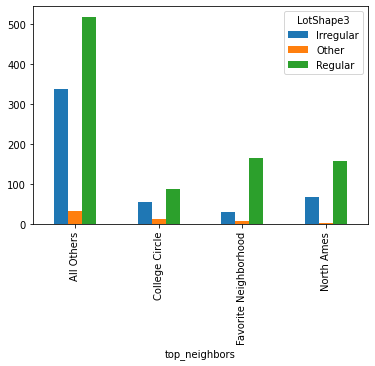

In [38]:
# Plot it
myresults = pd.crosstab(iowa['top_neighbors'], iowa['LotShape3'])
myresults.plot(kind='bar');

In [39]:
# 
pd.crosstab(iowa['OverallQual'], iowa['top_neighbors'])

top_neighbors,All Others,College Circle,Favorite Neighborhood,North Ames
OverallQual,,,,
1,2,0,0,0
2,3,0,0,0
3,11,0,6,3
4,78,1,17,20
5,209,28,47,113
6,243,24,33,74
7,179,71,57,12
8,110,23,32,3
9,36,3,4,0


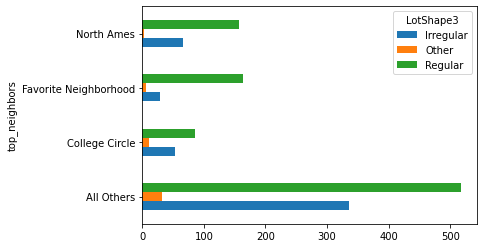

In [40]:
myresults.plot(kind='barh');

# Work with strings with pandas

In [41]:
# Loading a new dataset, we will use !wget bash command to download a dataset
# to the colab notebook.

!wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip

--2020-05-10 22:37:36--  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 54.71.0.232, 50.112.20.251, 52.26.240.115
Connecting to resources.lendingclub.com (resources.lendingclub.com)|54.71.0.232|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2018Q4.csv.zip’

LoanStats_2018Q4.cs     [              <=>   ]  22.05M  2.07MB/s    in 11s     

2020-05-10 22:37:48 (2.02 MB/s) - ‘LoanStats_2018Q4.csv.zip’ saved [23121687]



In [42]:
# Unzip the downloaded file
!unzip LoanStats_2018Q4.csv.zip

Archive:  LoanStats_2018Q4.csv.zip
  inflating: LoanStats_2018Q4.csv    


In [43]:
loans = pd.read_csv('LoanStats_2018Q4.csv')
loans.tail()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,4,7,13,18,19,24,25,27,28,29,30,31,32,34,36,37,38,39,40,41,42,43,44,46,49,50,51,53,54,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,113,114,115,116,117,118,119,120,121,126,127,131,132,134,135,136,141,142,143) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
NaN                                              NaN 5000  5000  5000   36 months  13.56% 169.83 C   C1  Payoff Clerk         10+ years MORTGAGE 35360.0 Not Verified    Oct-2018 Current n   NaN NaN debt_consolidation Debt consolidation      381xx TN  11.3  1   Jun-2006 0   21.0 NaN 9   0   2597 27.3% 15  f   2751.79 2751.79 3053.17 3053.17 2248.21 804.96  0.0 0.0 0.0 Apr-2020 169.83 May-2020 Apr-2020 0   NaN  1   Individual NaN NaN NaN 0   1413 69785 0   2   0   1   16.0 2379    40.0  3   4   1826 32.0 9500  0   0   1   5   8723   1174.0  60.9 0   0   147.0 85  9   9   2   10.0  21.0 9.0 21.0 0   1   3   2   2   6   6   7   3   9   0.0 0   0   3   92.9 50.0 0   0   93908   4976  3000  6028.0  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N   NaN NaN NaN NaN NaN                                                NaN                              
                                                     10000 10000 9750   36 months  11.06% 327.68 B   B3  NaN                  NaN       RENT     44400.0 Source Verified Oct-2018 Current n   NaN NaN credit_card        Credit card refinancing 980xx WA  11.78 0   Oct-2008 2   40.0 NaN 15  0   6269 13.1% 25  f   5411.74 5276.45 5882.88 5735.81 4588.26 1294.62 0.0 0.0 0.0 Apr-2020 327.68 May-2020 Apr-2020 0   53.0 1   Individual NaN NaN NaN 0   520  16440 3   1   1   1   2.0  10171   100.0 2   5   404  28.0 47700 0   3   5   6   1265.0 20037.0 2.3  0   0   61.0  119 1   1   0   1.0   NaN  1.0 40.0 1   2   4   6   8   3   14  22  4   15  0.0 0   0   3   92.0 0.0  0   0   57871.0 16440 20500 10171.0 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N   NaN NaN NaN NaN NaN                                                NaN                              
                                                                 10000  36 months  16.91% 356.08 C   C5  Key Accounts Manager 2 years   RENT     80000.0 Not Verified    Oct-2018 Current n   NaN NaN other              Other                   021xx MA  17.72 1   Sep-2006 0   14.0 NaN 17  0   1942 30.8% 31  w   5626.39 5626.39 6400.05 6400.05 4373.61 2026.44 0.0 0.0 0.0 Apr-2020 356.08 May-2020 Apr-2020 0   25.0 1   Individual NaN NaN NaN 0   0    59194 0   15  1   1   12.0 57252.0 85.0  0   0   1942 80.0 6300  0   5   0   1   3482   2058.0  48.5 0   0   144.0 142 40  12  0   131.0 30.0 NaN 30.0 3   1   1   1   5   22  2   9   1   17  0.0 0   0   1   74.2 0.0  0   0   73669   59194 4000  67369   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N   NaN NaN NaN NaN NaN                                                NaN                              
Total amount funded in policy code 1: 2050909275 NaN NaN   NaN   NaN   NaN        NaN     NaN    NaN NaN NaN                  NaN       NaN      NaN     NaN             NaN      NaN     NaN NaN NaN NaN                NaN                     NaN   NaN NaN   NaN NaN      NaN NaN  NaN NaN NaN NaN  NaN   NaN NaN NaN     NaN     NaN     NaN     NaN     NaN     NaN NaN NaN NaN      NaN    NaN      NaN      NaN NaN  NaN NaN        NaN NaN NaN NaN NaN  NaN   NaN NaN NaN NaN NaN  NaN     NaN   NaN NaN NaN  NaN  NaN   NaN NaN NaN NaN NaN    NaN     NaN  NaN NaN NaN   NaN NaN NaN NaN NaN   NaN  NaN NaN  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  NaN  NaN NaN NaN     NaN   NaN   NaN     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN                                                NaN                              
Total amount funded in policy code 2: 820109297  NaN NaN   NaN   NaN   NaN        NaN     NaN    NaN NaN NaN                  NaN       NaN      NaN     NaN             NaN      NaN     NaN NaN NaN NaN                NaN                     NaN   NaN NaN   NaN NaN      NaN N

In [44]:
loans.head()

Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
id  member_id loan_amnt funded_amnt funded_amnt_inv term       int_rate installment grade sub_grade emp_title             emp_length home_ownership annual_inc verification_status issue_d  loan_status pymnt_plan url desc purpose            title                   zip_code addr_state dti   delinq_2yrs earliest_cr_line inq_last_6mths mths_since_last_delinq mths_since_last_record open_acc pub_rec revol_bal revol_util total_acc initial_list_status out_prncp out_prncp_inv total_pymnt      total_pymnt_inv total_rec_prncp total_rec_int total_rec_late_fee recoveries collection_recovery_fee last_pymnt_d last_pymnt_amnt next_pymnt_d last_credit_pull_d collections_12_mths_ex_med mths_since_last_major_derog policy_code application_type annual_inc_joint dti_joint verification_status_joint acc_now_delinq tot_coll_amt tot_cur_bal open_acc_6m open_act_il open_il_12m open_il_24m mths_since_rcnt_il total_bal_il il_util open_rv_12m open_rv_24m max_bal_bc all_util total_rev_hi_lim inq_fi total_cu_tl inq_last_12m acc_open_past_24mths avg_cur_bal bc_open_to_buy bc_util chargeoff_within_12_mths delinq_amnt mo_sin_old_il_acct mo_sin_old_rev_tl_op mo_sin_rcnt_rev_tl_op mo_sin_rcnt_tl mort_acc mths_since_recent_bc mths_since_recent_bc_dlq mths_since_recent_inq mths_since_recent_revol_delinq num_accts_ever_120_pd num_actv_bc_tl num_actv_rev_tl num_bc_sats num_bc_tl num_il_tl num_op_rev_tl num_rev_accts num_rev_tl_bal_gt_0 num_sats num_tl_120dpd_2m num_tl_30dpd num_tl_90g_dpd_24m num_tl_op_past_12m pct_tl_nvr_dlq percent_bc_gt_75 pub_rec_bankruptcies tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit total_il_high_credit_limit revol_bal_joint sec_app_earliest_cr_line sec_app_inq_last_6mths sec_app_mort_acc sec_app_open_acc sec_app_revol_util sec_app_open_act_il sec_app_num_rev_accts sec_app_chargeoff_within_12_mths sec_app_collections_12_mths_ex_med sec_app_mths_since_last_major_derog hardship_flag hardship_type hardship_reason hardship_status deferral_term hardship_amount hardship_start_date hardship_end_date payment_plan_start_date hardship_length hardship_dpd hardship_loan_status orig_projected_additional_accrued_interest hardship_payoff_balance_amount hardship_last_payment_amount debt_settlement_flag debt_settlement_flag_date settlement_status settlement_date settlement_amount settlement_percentage                                    settlement_term                              
NaN NaN       10000     10000       10000            60 months  16.14%  243.93      C     C4        Sale Consultant       2 years    RENT           90000      Not Verified        Dec-2018 Fully Paid  n          NaN NaN  debt_consolidation Debt consolidation      079xx    NJ         8.8   0           Mar-1991         1              NaN                    43                     11       1       10582     58.5%      32        w                   0.00      0.00          10661.0577272374 10661.06        10000.00        661.06        0.0                0.0        0.0                     May-2019     9698.79         NaN          Dec-2019           0                          NaN                         1           Individual       NaN              NaN       NaN                       0              0            15470       1           1           0           1           18                 4888         65      1           3           2969       60       18100            2      0           2            4                    1719        4906           67.3    0                        0           133                333                  2                     2              1        2                    NaN                      1                     NaN                            0                     4              6               5           15        6         8             23            6                   11       0                0            0                  1                  100            80   

In [45]:
# We need to clean up these meaningless rows and clean up the
# dataset to be useful (everything is displayed as a column header)
# We can fix the header problem by using the 'skiprows' paramenter
# and remove the bottom rows with skipfooter

loans = pd.read_csv('LoanStats_2018Q4.csv', header=1, skipfooter=2)
loans.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,10000,10000,10000.0,60 months,16.14%,243.93,C,C4,Sale Consultant,2 years,RENT,90000.0,Not Verified,Dec-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,079xx,NJ,8.80,0,Mar-1991,1,NaN,43.0,11,1,10582,58.5%,32,w,0.00,0.00,10661.057727,10661.06,...,80.0,1,0,25600,15470,15000,7500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,6500,6500,6500.0,36 months,11.80%,215.28,B,B4,Educator,2 years,RENT,46500.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,352xx,AL,21.01,0,Aug-2011,1,61.0,NaN,24,0,6741,41.6%,30,w,4066.26,4066.26,3222.810000,3222.81,...,0.0,0,0,50845,40223,13300,34645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,4500,4500,4500.0,36 months,11.31%,147.99,B,B3,Accounts Examiner III,10+ years,RENT,38500.0,Not Verified,Dec-2018,Fully Paid,n,NaN,NaN,credit_card,Credit card refinancing,786xx,TX,4.64,0,Dec-2003,0,25.0,NaN,12,0,4472,15.3%,25,w,0.00,0.00,4549.217149,4549.22,...,0.0,0,0,53795,29137,15100,24595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,25000,25000,25000.0,60 months,14.47%,587.82,C,C2,teacher,10+ years,OWN,110000.0,Not Verified,Dec-2018,Charged Off,n,NaN,NaN,credit_card,Credit card refinancing,117xx,NY,26.43,1,Jan-1997,0,7.0,NaN,23,0,39053,45.7%,49,w,0.00,0.00,5848.050000,5848.05,...,10.0,0,0,179321,95648,62800,91424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,27.27%,920.91,E,E5,Claims Analyst,1 year,RENT,50000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,857xx,AZ,23.62,0,Dec-1997,1,NaN,NaN,10,0,1258,10.7%,16,w,25780.25,25780.25,13745.470000,13745.47,...,0.0,0,0,46300,27364,10100,34500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
loans.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
128407,NaN,NaN,23000,23000,23000.0,36 months,15.02%,797.53,C,C3,Tax Consultant,10+ years,MORTGAGE,75000.0,Source Verified,Oct-2018,Charged Off,n,NaN,NaN,debt_consolidation,Debt consolidation,352xx,AL,20.95,1,Aug-1985,2,22.0,NaN,12,0,22465,43.6%,28,w,0.00,0.00,1547.08,1547.08,...,14.3,0,0,296500,40614,47100,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128408,NaN,NaN,10000,10000,10000.0,36 months,15.02%,346.76,C,C3,security guard,5 years,MORTGAGE,38000.0,Not Verified,Oct-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,443xx,OH,13.16,3,Jul-1982,0,6.0,NaN,11,0,5634,37.1%,16,w,5557.25,5557.25,6233.34,6233.34,...,40.0,0,0,91403,9323,9100,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128409,NaN,NaN,5000,5000,5000.0,36 months,13.56%,169.83,C,C1,Payoff Clerk,10+ years,MORTGAGE,35360.0,Not Verified,Oct-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,381xx,TN,11.30,1,Jun-2006,0,21.0,NaN,9,0,2597,27.3%,15,f,2751.79,2751.79,3053.17,3053.17,...,50.0,0,0,93908,4976,3000,6028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128410,NaN,NaN,10000,10000,9750.0,36 months,11.06%,327.68,B,B3,NaN,NaN,RENT,44400.0,Source Verified,Oct-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,980xx,WA,11.78,0,Oct-2008,2,40.0,NaN,15,0,6269,13.1%,25,f,5411.74,5276.45,5882.88,5735.81,...,0.0,0,0,57871,16440,20500,10171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128411,NaN,NaN,10000,10000,10000.0,36 months,16.91%,356.08,C,C5,Key Accounts Manager,2 years,RENT,80000.0,Not Verified,Oct-2018,Current,n,NaN,NaN,other,Other,021xx,MA,17.72,1,Sep-2006,0,14.0,NaN,17,0,1942,30.8%,31,w,5626.39,5626.39,6400.05,6400.05,...,0.0,0,0,73669,59194,4000,67369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
# Sum null values by column and sort from least to greatest
pd.set_option('display.max_rows', 145)
loans.isnull().sum().sort_values(ascending=False)

id                                            128412
member_id                                     128412
url                                           128412
desc                                          128412
settlement_percentage                         127661
settlement_term                               127661
settlement_date                               127661
debt_settlement_flag_date                     127661
settlement_status                             127661
settlement_amount                             127661
sec_app_mths_since_last_major_derog           123258
hardship_loan_status                          117705
hardship_status                               117691
hardship_reason                               117691
hardship_dpd                                  117690
hardship_length                               117690
payment_plan_start_date                       117690
hardship_end_date                             117690
hardship_start_date                           

In [48]:
# # Drop columns that are made up entirely of NaN values
# id                                            128412
# member_id                                     128412
# url                                           128412
# desc                                          128412

# loans.drop('id', axis=1, inplace=True)
# loans.drop('member_id', axis=1, inplace=True)
# loans.drop('url', axis=1, inplace=True)
# loans.drop('desc', axis=1, inplace=True)

loans.drop(['id', 'member_id', 'url', 'desc'], axis=1, inplace=True)
loans.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,10000,10000,10000.0,60 months,16.14%,243.93,C,C4,Sale Consultant,2 years,RENT,90000.0,Not Verified,Dec-2018,Fully Paid,n,debt_consolidation,Debt consolidation,079xx,NJ,8.80,0,Mar-1991,1,NaN,43.0,11,1,10582,58.5%,32,w,0.00,0.00,10661.057727,10661.06,10000.00,661.06,0.0,0.0,...,80.0,1,0,25600,15470,15000,7500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,6500,6500,6500.0,36 months,11.80%,215.28,B,B4,Educator,2 years,RENT,46500.0,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,352xx,AL,21.01,0,Aug-2011,1,61.0,NaN,24,0,6741,41.6%,30,w,4066.26,4066.26,3222.810000,3222.81,2433.74,789.07,0.0,0.0,...,0.0,0,0,50845,40223,13300,34645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,4500,4500,4500.0,36 months,11.31%,147.99,B,B3,Accounts Examiner III,10+ years,RENT,38500.0,Not Verified,Dec-2018,Fully Paid,n,credit_card,Credit card refinancing,786xx,TX,4.64,0,Dec-2003,0,25.0,NaN,12,0,4472,15.3%,25,w,0.00,0.00,4549.217149,4549.22,4500.00,49.22,0.0,0.0,...,0.0,0,0,53795,29137,15100,24595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,25000,25000,25000.0,60 months,14.47%,587.82,C,C2,teacher,10+ years,OWN,110000.0,Not Verified,Dec-2018,Charged Off,n,credit_card,Credit card refinancing,117xx,NY,26.43,1,Jan-1997,0,7.0,NaN,23,0,39053,45.7%,49,w,0.00,0.00,5848.050000,5848.05,3024.11,2823.94,0.0,0.0,...,10.0,0,0,179321,95648,62800,91424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,30000,30000,30000.0,60 months,27.27%,920.91,E,E5,Claims Analyst,1 year,RENT,50000.0,Not Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,857xx,AZ,23.62,0,Dec-1997,1,NaN,NaN,10,0,1258,10.7%,16,w,25780.25,25780.25,13745.470000,13745.47,4219.75,9525.72,0.0,0.0,...,0.0,0,0,46300,27364,10100,34500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
loans.tail()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
128407,23000,23000,23000.0,36 months,15.02%,797.53,C,C3,Tax Consultant,10+ years,MORTGAGE,75000.0,Source Verified,Oct-2018,Charged Off,n,debt_consolidation,Debt consolidation,352xx,AL,20.95,1,Aug-1985,2,22.0,NaN,12,0,22465,43.6%,28,w,0.00,0.00,1547.08,1547.08,1025.67,521.41,0.0,0.0,...,14.3,0,0,296500,40614,47100,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128408,10000,10000,10000.0,36 months,15.02%,346.76,C,C3,security guard,5 years,MORTGAGE,38000.0,Not Verified,Oct-2018,Current,n,debt_consolidation,Debt consolidation,443xx,OH,13.16,3,Jul-1982,0,6.0,NaN,11,0,5634,37.1%,16,w,5557.25,5557.25,6233.34,6233.34,4442.75,1790.59,0.0,0.0,...,40.0,0,0,91403,9323,9100,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128409,5000,5000,5000.0,36 months,13.56%,169.83,C,C1,Payoff Clerk,10+ years,MORTGAGE,35360.0,Not Verified,Oct-2018,Current,n,debt_consolidation,Debt consolidation,381xx,TN,11.30,1,Jun-2006,0,21.0,NaN,9,0,2597,27.3%,15,f,2751.79,2751.79,3053.17,3053.17,2248.21,804.96,0.0,0.0,...,50.0,0,0,93908,4976,3000,6028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128410,10000,10000,9750.0,36 months,11.06%,327.68,B,B3,NaN,NaN,RENT,44400.0,Source Verified,Oct-2018,Current,n,credit_card,Credit card refinancing,980xx,WA,11.78,0,Oct-2008,2,40.0,NaN,15,0,6269,13.1%,25,f,5411.74,5276.45,5882.88,5735.81,4588.26,1294.62,0.0,0.0,...,0.0,0,0,57871,16440,20500,10171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128411,10000,10000,10000.0,36 months,16.91%,356.08,C,C5,Key Accounts Manager,2 years,RENT,80000.0,Not Verified,Oct-2018,Current,n,other,Other,021xx,MA,17.72,1,Sep-2006,0,14.0,NaN,17,0,1942,30.8%,31,w,5626.39,5626.39,6400.05,6400.05,4373.61,2026.44,0.0,0.0,...,0.0,0,0,73669,59194,4000,67369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
# Clean up Int_rate column
loans['int_rate'].head(10)

0     16.14%
1     11.80%
2     11.31%
3     14.47%
4     27.27%
5     16.14%
6     12.98%
7     12.98%
8     10.33%
9     23.40%
Name: int_rate, dtype: object

In [51]:
# look at specific value from the int_rate column
loans['int_rate'][4]

' 27.27%'

In [52]:
# confirm its type
loans['int_rate'].dtype

dtype('O')

In [53]:
# confirm again
type(loans['int_rate'][4])

str

In [0]:
# String column should be numeric
# % sign included with the number
# leading space at the beginning of the string

# Start by fixing a single string
int_rate= '  27.27%'

In [55]:
# remove leading space using .strip()
int_rate.strip()

'27.27%'

In [56]:
# remove % from the string - by passing into the method what you want removed
int_rate.strip('%')

'  27.27'

In [57]:
# remove both from the string
int_rate.strip().strip('%')

'27.27'

In [58]:
# "Cast" the string value to a float
float('27.27')

27.27

In [59]:
# Put it all together
float(int_rate.strip().strip('%'))

27.27

In [60]:
# check our work!
type(float(int_rate.strip().strip('%')))

float

In [0]:
# WRITE A FUNCTION!!!
def myfunc(my_input_value):
  return float(my_input_value.strip().strip('%'))

In [62]:
myfunc(int_rate)

27.27

In [63]:
type(myfunc(int_rate))

float

# Apply solution to every cell in the column

In [0]:
# For loop
new_list=[]
for cell in loans['int_rate']:
  new_list.append(myfunc(cell))



In [65]:
new_list[:10]

[16.14, 11.8, 11.31, 14.47, 27.27, 16.14, 12.98, 12.98, 10.33, 23.4]

In [66]:
# compare to original values
loans['int_rate'].head()


0     16.14%
1     11.80%
2     11.31%
3     14.47%
4     27.27%
Name: int_rate, dtype: object

In [67]:
list(loans['int_rate'][:10])

[' 16.14%',
 ' 11.80%',
 ' 11.31%',
 ' 14.47%',
 ' 27.27%',
 ' 16.14%',
 ' 12.98%',
 ' 12.98%',
 ' 10.33%',
 ' 23.40%']

In [0]:
# convert the list to a new column
loans['int_rate_clean'] = pd.Series(new_list)

In [69]:
# comparison
loans[['int_rate', 'int_rate_clean']].sample(7)

,int_rate,int_rate_clean
104152,10.47%,10.47
119274,6.11%,6.11
38342,7.56%,7.56
20613,10.33%,10.33
35267,18.94%,18.94
81976,11.06%,11.06
47779,16.14%,16.14


In [70]:
# what type of data is held in the new cleaned up column?
loans['int_rate_clean'].dtype

dtype('float64')

In [0]:
# There is a better way!
# Using .apply function we can cut unnecessary steps
loans['int_rate_clean2'] = loans['int_rate'].apply(myfunc)

In [72]:
# Another comparison
loans[['int_rate', 'int_rate_clean', 'int_rate_clean2']].sample(8)

,int_rate,int_rate_clean,int_rate_clean2
69745,6.67%,6.67,6.67
41425,7.56%,7.56,7.56
100483,7.84%,7.84,7.84
26417,6.46%,6.46,6.46
118459,6.67%,6.67,6.67
77575,10.47%,10.47,10.47
102688,11.55%,11.55,11.55
118749,18.94%,18.94,18.94


#Clean up another column!

In [73]:
loans['emp_title'].head(15)

0                          Sale Consultant
1                                Educator 
2                    Accounts Examiner III
3                                  teacher
4                           Claims Analyst
5                         Training Manager
6                             Tire builder
7               Program Support Assistant 
8                                   Driver
9                                   BANKER
10                        Business Analyst
11                                OPERATOR
12                        Shift Supervisor
13                                 Driver 
14    Assistant to the Treasurer (Payroll)
Name: emp_title, dtype: object

In [74]:
# look at the top 20 employment titles
loans['emp_title'].value_counts(dropna=False).head(20)

NaN                   20947
Teacher                2090
Manager                1773
Registered Nurse        952
Driver                  924
RN                      726
Supervisor              697
Sales                   580
Project Manager         526
General Manager         523
Office Manager          521
Owner                   420
Director                402
Operations Manager      387
Truck Driver            387
Nurse                   326
Engineer                325
Sales Manager           304
manager                 301
Supervisor              270
Name: emp_title, dtype: int64

In [75]:
# How many different unique titles are there currently?
print(loans.shape)
len(loans['emp_title'].unique())

(128412, 142)


43893

In [76]:
# Another way to do this, not using len
loans['emp_title'].nunique()

43892

In [77]:
# How often is the employment title null?
loans['emp_title'].isnull().sum()

20947

In [0]:
# Practice cleaning up an example
examples = ['owner', 'Supervisor', 'Project Manager', np.nan]

In [79]:
# Two ways to check type
type('Supervisor')
isinstance('Supervisor', str)

True

In [80]:
# What about the strip?
' supervisor'.title().strip()

'Supervisor'

In [0]:
# Write a function to clean up and increase uniformity
def clean_title(jobtitle):
  if isinstance(jobtitle, str):
    return (jobtitle.title().strip())
  else:
    return 'Unknown'

In [82]:
# Test out the new function
clean_title('  supervISOR')

'Supervisor'

In [83]:
clean_title(np.nan)

'Unknown'

In [84]:
mylist = []
for jobtitle in examples:
  mylist.append(clean_title(jobtitle))
mylist

['Owner', 'Supervisor', 'Project Manager', 'Unknown']

In [85]:
# List comprehension an combine function calls for loops over lists
# into one succint and fairly readable single line of code
[clean_title(jobtitle) for jobtitle in examples]

['Owner', 'Supervisor', 'Project Manager', 'Unknown']

In [0]:
# Now that we have a working function, lets apply it to our colomn, overwriting 
# the original column

loans['clean_title'] = loans['emp_title'].apply(clean_title)

In [87]:
loans[['emp_title', 'clean_title']].sample(20)

,emp_title,clean_title
68012,NaN,Unknown
100840,Messaging Expert,Messaging Expert
51830,Lpn,Lpn
16916,Associate Director of Admissions,Associate Director Of Admissions
94676,Yard Forman,Yard Forman
51361,Corporate Analyst,Corporate Analyst
51423,Phlebotomist,Phlebotomist
35643,Welder,Welder
92891,Associate Dentist,Associate Dentist
102439,Housekeeper,Housekeeper


#Working with Dates and Times with Pandas


In [88]:
loans.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,int_rate_clean,int_rate_clean2,clean_title
0,10000,10000,10000.0,60 months,16.14%,243.93,C,C4,Sale Consultant,2 years,RENT,90000.0,Not Verified,Dec-2018,Fully Paid,n,debt_consolidation,Debt consolidation,079xx,NJ,8.80,0,Mar-1991,1,NaN,43.0,11,1,10582,58.5%,32,w,0.00,0.00,10661.057727,10661.06,10000.00,661.06,0.0,0.0,...,25600,15470,15000,7500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,16.14,16.14,Sale Consultant
1,6500,6500,6500.0,36 months,11.80%,215.28,B,B4,Educator,2 years,RENT,46500.0,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,352xx,AL,21.01,0,Aug-2011,1,61.0,NaN,24,0,6741,41.6%,30,w,4066.26,4066.26,3222.810000,3222.81,2433.74,789.07,0.0,0.0,...,50845,40223,13300,34645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,11.80,11.80,Educator
2,4500,4500,4500.0,36 months,11.31%,147.99,B,B3,Accounts Examiner III,10+ years,RENT,38500.0,Not Verified,Dec-2018,Fully Paid,n,credit_card,Credit card refinancing,786xx,TX,4.64,0,Dec-2003,0,25.0,NaN,12,0,4472,15.3%,25,w,0.00,0.00,4549.217149,4549.22,4500.00,49.22,0.0,0.0,...,53795,29137,15100,24595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,11.31,11.31,Accounts Examiner Iii
3,25000,25000,25000.0,60 months,14.47%,587.82,C,C2,teacher,10+ years,OWN,110000.0,Not Verified,Dec-2018,Charged Off,n,credit_card,Credit card refinancing,117xx,NY,26.43,1,Jan-1997,0,7.0,NaN,23,0,39053,45.7%,49,w,0.00,0.00,5848.050000,5848.05,3024.11,2823.94,0.0,0.0,...,179321,95648,62800,91424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,14.47,14.47,Teacher
4,30000,30000,30000.0,60 months,27.27%,920.91,E,E5,Claims Analyst,1 year,RENT,50000.0,Not Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,857xx,AZ,23.62,0,Dec-1997,1,NaN,NaN,10,0,1258,10.7%,16,w,25780.25,25780.25,13745.470000,13745.47,4219.75,9525.72,0.0,0.0,...,46300,27364,10100,34500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,27.27,27.27,Claims Analyst


In [89]:
loans.columns


Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       ...
       'debt_settlement_flag', 'debt_settlement_flag_date',
       'settlement_status', 'settlement_date', 'settlement_amount',
       'settlement_percentage', 'settlement_term', 'int_rate_clean',
       'int_rate_clean2', 'clean_title'],
      dtype='object', length=143)

In [90]:
loans['issue_d'].head()

0    Dec-2018
1    Dec-2018
2    Dec-2018
3    Dec-2018
4    Dec-2018
Name: issue_d, dtype: object

In [91]:
# as a for loop:
mylst = []
for col in loans.columns:
  if col.endswith('_d'):
    mylst.append(col)
mylst

['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

In [92]:
# as a list comprehension:
my_date_cols = [col for col in loans.columns if col.endswith('_d')]
my_date_cols

['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

In [93]:
# dtype
type(loans['issue_d'][0])

str

In [0]:
# infer_datetime_format=True
loans['new_issue_d'] = pd.to_datetime(loans['issue_d'], infer_datetime_format=True)

In [95]:
loans[['new_issue_d', 'issue_d']].sample(10)

,new_issue_d,issue_d
90992,2018-10-01,Oct-2018
99198,2018-10-01,Oct-2018
124394,2018-10-01,Oct-2018
109432,2018-10-01,Oct-2018
3509,2018-12-01,Dec-2018
111200,2018-10-01,Oct-2018
119288,2018-10-01,Oct-2018
56825,2018-11-01,Nov-2018
10238,2018-12-01,Dec-2018
112882,2018-10-01,Oct-2018


In [96]:
# Check the work
type(loans['new_issue_d'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [97]:
print(loans['new_issue_d'].dtype)
loans['new_issue_d'].dtype

datetime64[ns]


dtype('<M8[ns]')

In [98]:
loans['new_issue_d'].head(1).values

array(['2018-12-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [99]:
# We can use the .dt accessor to now grab specific parts of the datetime object. 
# Lets grab just the year from all of the cells in 'issue_d'

loans['year'] = loans['new_issue_d'].dt.year
loans[['year', 'new_issue_d']].sample(10)

,year,new_issue_d
71204,2018,2018-11-01
16255,2018,2018-12-01
84244,2018,2018-10-01
50493,2018,2018-11-01
32273,2018,2018-12-01
117135,2018,2018-10-01
31668,2018,2018-12-01
16739,2018,2018-12-01
28418,2018,2018-12-01
16190,2018,2018-12-01


In [100]:
loans['month'] = loans['new_issue_d'].dt.month
loans[['month', 'new_issue_d']].sample(10)

,month,new_issue_d
47368,11,2018-11-01
101210,10,2018-10-01
101946,10,2018-10-01
42390,11,2018-11-01
47102,11,2018-11-01
120473,10,2018-10-01
82452,10,2018-10-01
33683,12,2018-12-01
17759,12,2018-12-01
108956,10,2018-10-01


In [101]:
loans['weekday'] = loans['new_issue_d'].dt.weekday
loans[['issue_d', 'new_issue_d', 'year', 'month', 'weekday']].sample(10)

,issue_d,new_issue_d,year,month,weekday
43749,Nov-2018,2018-11-01,2018,11,3
92498,Oct-2018,2018-10-01,2018,10,0
95809,Oct-2018,2018-10-01,2018,10,0
127356,Oct-2018,2018-10-01,2018,10,0
65452,Nov-2018,2018-11-01,2018,11,3
105823,Oct-2018,2018-10-01,2018,10,0
116648,Oct-2018,2018-10-01,2018,10,0
55756,Nov-2018,2018-11-01,2018,11,3
60823,Nov-2018,2018-11-01,2018,11,3
84880,Oct-2018,2018-10-01,2018,10,0


In [102]:
loans['new_pull'] = pd.to_datetime(loans['last_credit_pull_d'])
loans['month_pull'] = loans['new_pull'].dt.month
loans[['last_credit_pull_d', 'new_pull', 'month_pull']].head()

,last_credit_pull_d,new_pull,month_pull
0,Dec-2019,2019-12-01,12.0
1,Apr-2020,2020-04-01,4.0
2,Feb-2020,2020-02-01,2.0
3,Apr-2020,2020-04-01,4.0
4,Apr-2020,2020-04-01,4.0


Because all of these dates come from Q4 of 2018, the issue_d column isn't all that interesting. Lets look at the earliest_cr_line column, which is also a string, but that could be converted to datetime format.

We're going to create a new column called days_from_earliest_credit_to_issue

It's a long column header, but think about how valuable this piece of information could be. This number will essentially indicate the length of a person's credit history and if that is correlated with repayment or other factors could be a valuable predictor!


In [103]:
loans['earliest_cr_line'].head()


0    Mar-1991
1    Aug-2011
2    Dec-2003
3    Jan-1997
4    Dec-1997
Name: earliest_cr_line, dtype: object

In [104]:
type(loans['earliest_cr_line'][3])

str

In [105]:
loans['days_from_earliest_credit_to_issue'] = pd.to_datetime(loans['earliest_cr_line'], infer_datetime_format=True)
loans[['days_from_earliest_credit_to_issue', 'earliest_cr_line']].sample(10)

,days_from_earliest_credit_to_issue,earliest_cr_line
66382,2007-12-01,Dec-2007
84327,2006-09-01,Sep-2006
47536,2014-11-01,Nov-2014
16946,2010-09-01,Sep-2010
94173,2005-03-01,Mar-2005
29045,1995-08-01,Aug-1995
39377,1987-09-01,Sep-1987
44850,2015-10-01,Oct-2015
58592,2014-02-01,Feb-2014
99388,1982-12-01,Dec-1982


In [106]:
loans[['days_from_earliest_credit_to_issue', 'new_issue_d']].sample(10)

,days_from_earliest_credit_to_issue,new_issue_d
112143,1997-04-01,2018-10-01
3842,2007-08-01,2018-12-01
71061,2008-09-01,2018-11-01
127944,2001-04-01,2018-10-01
70047,2005-02-01,2018-11-01
29325,2005-09-01,2018-12-01
83585,1976-01-01,2018-10-01
18911,2002-05-01,2018-12-01
66500,1997-12-01,2018-11-01
103318,1996-09-01,2018-10-01


In [107]:
loans['credit_length'] = loans['new_issue_d'] - loans['days_from_earliest_credit_to_issue']

loans[['days_from_earliest_credit_to_issue', 'new_issue_d', 'credit_length']].sample(10)

,days_from_earliest_credit_to_issue,new_issue_d,credit_length
86597,2009-01-01,2018-10-01,3560 days
54753,2003-04-01,2018-11-01,5693 days
107819,2007-06-01,2018-10-01,4140 days
69373,2003-11-01,2018-11-01,5479 days
120101,2014-09-01,2018-10-01,1491 days
88788,2009-01-01,2018-10-01,3560 days
66004,2001-04-01,2018-11-01,6423 days
35755,2003-03-01,2018-12-01,5754 days
8500,2007-07-01,2018-12-01,4171 days
97929,2002-09-01,2018-10-01,5874 days


In [108]:
loans ['credit_length'].value_counts().sort_index().head(20)

1126 days     67
1127 days     38
1157 days    163
1187 days     62
1188 days    148
1218 days    190
1219 days     75
1249 days    235
1279 days    151
1280 days     57
1310 days    226
1338 days     99
1340 days     68
1341 days     76
1369 days    149
1371 days     85
1399 days     73
1400 days    158
1430 days    164
1431 days     80
Name: credit_length, dtype: int64

In [109]:
loans['credit_length'].value_counts().sort_index().tail(20)

20758 days    1
20788 days    1
20850 days    1
21033 days    1
21092 days    2
21123 days    1
21367 days    1
21458 days    2
21489 days    1
21519 days    2
21580 days    1
21854 days    2
22188 days    1
22249 days    1
22980 days    1
23621 days    1
23710 days    2
24990 days    1
25141 days    1
25171 days    1
Name: credit_length, dtype: int64

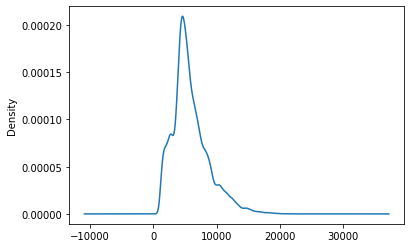

In [110]:
# Density Plot of credit lengths
loans['credit_length'].astype('timedelta64[D]').plot(kind='kde');

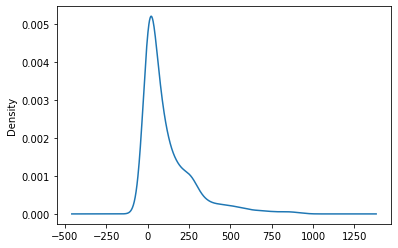

In [111]:
loans['credit_length'].value_counts().plot.density();

Convert the term column from string to integer.



In [112]:
loans['term'].sample(10)


127534     36 months
92025      36 months
121264     36 months
30253      36 months
50231      60 months
37022      60 months
8296       36 months
68913      36 months
95005      60 months
100171     60 months
Name: term, dtype: object

In [0]:
def function3(my_input):
  return int(my_input.strip('months').strip())

In [0]:
loans['new_term'] = loans['term'].apply(function3)

In [115]:
loans['new_term'].sample(20)

59107     36
102520    60
73045     60
115325    36
97694     36
69280     36
114022    36
125235    36
67180     36
107020    36
53033     36
97709     60
55796     60
27040     36
14347     36
3000      36
74883     60
118504    60
116999    60
69288     36
Name: new_term, dtype: int64

Make a column named loan_status_is_great. It should contain the integer 1 if loan_status is "Current" or "Fully Paid." Else it should contain the integer 0.


In [0]:
def loan_processor(loanstatus):
  if loanstatus == 'Current':
    return 1
  elif loanstatus == 'Fully Paid':
    return 1
  else:
    return 0
                

In [0]:
loan_stat = ['Current', 'Current', 'Unpaid', 'Defaulted', 'Fully Paid']

In [118]:
loanlist = []
for loanstatus in loan_stat:
  loanlist.append(loan_processor(loanstatus))

loanlist

[1, 1, 0, 0, 1]

In [0]:
loans['loan_status_is_great'] = loans['loan_status'].apply(loan_processor)

In [121]:
loans[['loan_status_is_great', 'loan_status']].sample(20)

,loan_status_is_great,loan_status
102982,1,Current
84193,1,Current
6664,1,Current
24028,1,Current
4760,0,In Grace Period
92307,1,Current
66300,1,Fully Paid
32948,1,Current
82979,0,Charged Off
96733,1,Current


Make last_pymnt_d_month and last_pymnt_d_year columns.

In [122]:
loans['last_pymnt_d'][:10]

0    May-2019
1    Mar-2020
2    Feb-2019
3    Oct-2019
4    Mar-2020
5    Mar-2020
6    Mar-2020
7    Mar-2020
8    Mar-2020
9    Dec-2019
Name: last_pymnt_d, dtype: object

In [123]:
loans['last_pymnt_d'].isnull().sum()

159

In [0]:
loans['last_pymnt_d'].dropna(inplace=True)

In [125]:
loans['last_pymnt_d'].isnull().sum()

0

In [0]:
loans['last_payment_date'] = pd.to_datetime(loans['last_pymnt_d'], infer_datetime_format=True)

In [127]:
loans['last_payment_date'].sample(4)

82090    2020-04-01
7967     2020-03-01
11820    2020-04-01
122266   2019-12-01
Name: last_payment_date, dtype: datetime64[ns]

In [0]:
loans['last_payment_date'].dropna(inplace=True)

In [130]:
loans['last_payment_date'].isnull().sum()

0

In [0]:
loans['last_pymnt_d_year'] = loans['last_payment_date'].dt.year
loans['last_pymnt_d_month'] = loans['last_payment_date'].dt.month

In [141]:
loans[['last_pymnt_d', 'last_payment_date', 'last_pymnt_d_year', 'last_pymnt_d_month']].sample(5)

,last_pymnt_d,last_payment_date,last_pymnt_d_year,last_pymnt_d_month
85870,Apr-2020,2020-04-01,None,4.0
59712,Mar-2020,2020-03-01,None,3.0
116476,Mar-2019,2019-03-01,None,3.0
74307,Feb-2019,2019-02-01,None,2.0
85006,Aug-2019,2019-08-01,None,8.0


In [133]:
type(loans['last_pymnt_d_month'][10])

numpy.float64

In [0]:
loans['last_pymnt_d_month'].isnull().sum()

159

# Stretch Goals

You can do more with the LendingClub or Instacart datasets.

LendingClub options:
- There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.
- Modify the `emp_title` column to replace titles with 'Other' if the title is not in the top 20. 
- Take initiatve and work on your own ideas!

Instacart options:
- Read [Instacart Market Basket Analysis, Winner's Interview: 2nd place, Kazuki Onodera](http://blog.kaggle.com/2017/09/21/instacart-market-basket-analysis-winners-interview-2nd-place-kazuki-onodera/), especially the **Feature Engineering** section. (Can you choose one feature from his bulleted lists, and try to engineer it with pandas code?)
- Read and replicate parts of [Simple Exploration Notebook - Instacart](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart). (It's the Python Notebook with the most upvotes for this Kaggle competition.)
- Take initiative and work on your own ideas!

In [0]:
loans['revol_util'].value_counts(dropna=False)


0%        1132
43%        225
49%        222
39.1%      220
32%        217
          ... 
107.6%       1
105.6%       1
103.7%       1
110.3%       1
104.4%       1
Name: revol_util, Length: 1075, dtype: int64

In [0]:
loans['revol_util'].isnull().sum()

156

In [0]:
loans['revol_util'].dropna(inplace=True)

In [0]:
loans['revol_util'].isnull().sum()

0

In [0]:
type(loans['revol_util'][15])

str

In [0]:
loans['revol_util'].sample(10)

40168        0%
18311     33.3%
12520     36.1%
47518     89.9%
82026       71%
1874      38.1%
120886    34.7%
117174    78.7%
33064     17.5%
97974       28%
Name: revol_util, dtype: object

In [0]:
loans['revol_util'].dropna(inplace=True)

In [0]:
loans['revol_util'].isnull().sum()

0

In [0]:
def mynewfunc(my_input_value):
  return float(my_input_value.strip().strip('%'))

In [0]:
loans['new_revol_util'] = loans['revol_util'].apply(mynewfunc)

In [0]:
loans[['revol_util', 'new_revol_util']].sample(10)

,revol_util,new_revol_util
57357,29.2%,29.2
21320,69.1%,69.1
39656,11.2%,11.2
70252,16.1%,16.1
680,30.4%,30.4
4055,36.5%,36.5
78318,39%,39.0
40451,41.8%,41.8
29360,20.9%,20.9
104093,38.6%,38.6


In [0]:
loans['new_revol_util'].dtype


dtype('float64')

In [0]:
type(loans['new_revol_util'][3])

numpy.float64

#Modify the emp_title column to replace titles with 'Other' if the title is not in the top 20. 

In [173]:
# cast the index of the top 20 value counts to a new list

top_emp_title = loans['emp_title'].value_counts().index[:20].tolist()
print(top_emp_title)

['Teacher', 'Manager', 'Registered Nurse', 'Driver', 'RN', 'Supervisor', 'Sales', 'Project Manager', 'General Manager', 'Office Manager', 'Owner', 'Director', 'Operations Manager', 'Truck Driver', 'Nurse', 'Engineer', 'Sales Manager', 'manager', 'Supervisor ', 'Administrative Assistant']


In [167]:
top_emp_title

['Teacher',
 'Manager',
 'Registered Nurse',
 'Driver',
 'RN',
 'Supervisor',
 'Sales',
 'Project Manager',
 'General Manager',
 'Office Manager',
 'Owner',
 'Director',
 'Operations Manager',
 'Truck Driver',
 'Nurse',
 'Engineer',
 'Sales Manager',
 'manager',
 'Supervisor ',
 'Administrative Assistant']

In [0]:
# Keep working this!

def title_processor(employment):
  if employment.isin([top_emp_title]):
    return employment
  else:
    return 'Other'

In [0]:
# # This is a very inelegant way to accomplish the goal


# def re_titler(em_title):
#   if em_title == 'Teacher':
#     return em_title
#   elif em_title == 'Manager':
#     return em_title
#   elif em_title == 'Registered Nurse':
#     return em_title
#   elif em_title == 'Driver':
#     return em_title
#   elif em_title == 'RN':
#     return em_title
#   elif em_title == 'Supervisor':
#     return em_title
#   elif em_title == 'Sales':
#     return em_title
#   elif em_title == 'Project Manager':
#     return em_title
#   elif em_title == 'General Manager':
#     return em_title
#   elif em_title == 'Office Manager':
#     return em_title
#   elif em_title == 'Owner':
#     return em_title
#   elif em_title == 'Director':
#     return em_title
#   elif em_title == 'Operations Manager':
#     return em_title
#   elif em_title == 'Truck Driver':
#     return em_title
#   elif em_title == 'Nurse':
#     return em_title
#   elif em_title == 'Engineer':
#     return em_title
#   elif em_title == 'Sales Manager':
#     return em_title
#   elif em_title == 'manager':
#     return em_title
#   elif em_title == 'Supervisor ':
#     return em_title
#   elif em_title == 'Administrative Assistant':
#     return em_title
#   else:
#     return 'Other'
                

In [0]:
# loans['new_emp_title'] = loans['emp_title'].apply(re_titler)

In [171]:
# loans[['new_emp_title', 'emp_title']].sample(20)

,new_emp_title,emp_title
125328,Other,Plant Operations Manager
76157,Driver,Driver
59146,Other,IT Help Desk
40372,Other,Logistics Manager
13330,Other,NaN
56361,Other,Air Traffic Controller
61587,Other,NaN
94426,Registered Nurse,Registered Nurse
119575,Other,Human Resource Manager
128358,Other,Controller


In [172]:
# loans['new_emp_title'].value_counts()

Other                       115709
Teacher                       2090
Manager                       1773
Registered Nurse               952
Driver                         924
RN                             726
Supervisor                     697
Sales                          580
Project Manager                526
General Manager                523
Office Manager                 521
Owner                          420
Director                       402
Truck Driver                   387
Operations Manager             387
Nurse                          326
Engineer                       325
Sales Manager                  304
manager                        301
Supervisor                     270
Administrative Assistant       269
Name: new_emp_title, dtype: int64